# Analisis de los modos normales

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nmodes = pd.read_excel("nmodes.xlsx")

In [3]:
nmodes = nmodes.query('~Modo_1.isna()') 
nmodes.query('NN == "DFT" |NN == "inicial" |NN == "15_50"').T

,0,1,11
NN,DFT,inicial,15_50
Modo_1,1288.0,1250.40374,1418.14127
Modo_2,1514.0,1487.29184,1646.33653
Modo_3,2975.0,2902.84728,2810.29901
Modo_4,3092.0,2945.30137,3058.2612


In [4]:
nmodes_dft = nmodes.query("NN == 'DFT'")

In [5]:
def plot_modos(modo:str, ax):
    sns.scatterplot(data=nmodes, x='NN', y = modo, marker = 'o', ax=ax)
    ax.set_title("Energia de los modos normales para distintas redes: "+str(modo))
    ax.set_ylabel(f'Energia del {modo} [$cm^{-1}$]'.format())
    ax.set_xlabel('Etiqueta de la red')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)    
    ax.axhline(y=nmodes_dft[modo].values, color = 'red', linestyle='--')
    return ax


C:\Users\guill\AppData\Local\Temp\ipykernel_4152\1316771918.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\guill\AppData\Local\Temp\ipykernel_4152\1316771918.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\guill\AppData\Local\Temp\ipykernel_4152\1316771918.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\guill\AppData\Local\Temp\ipykernel_4152\1316771918.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


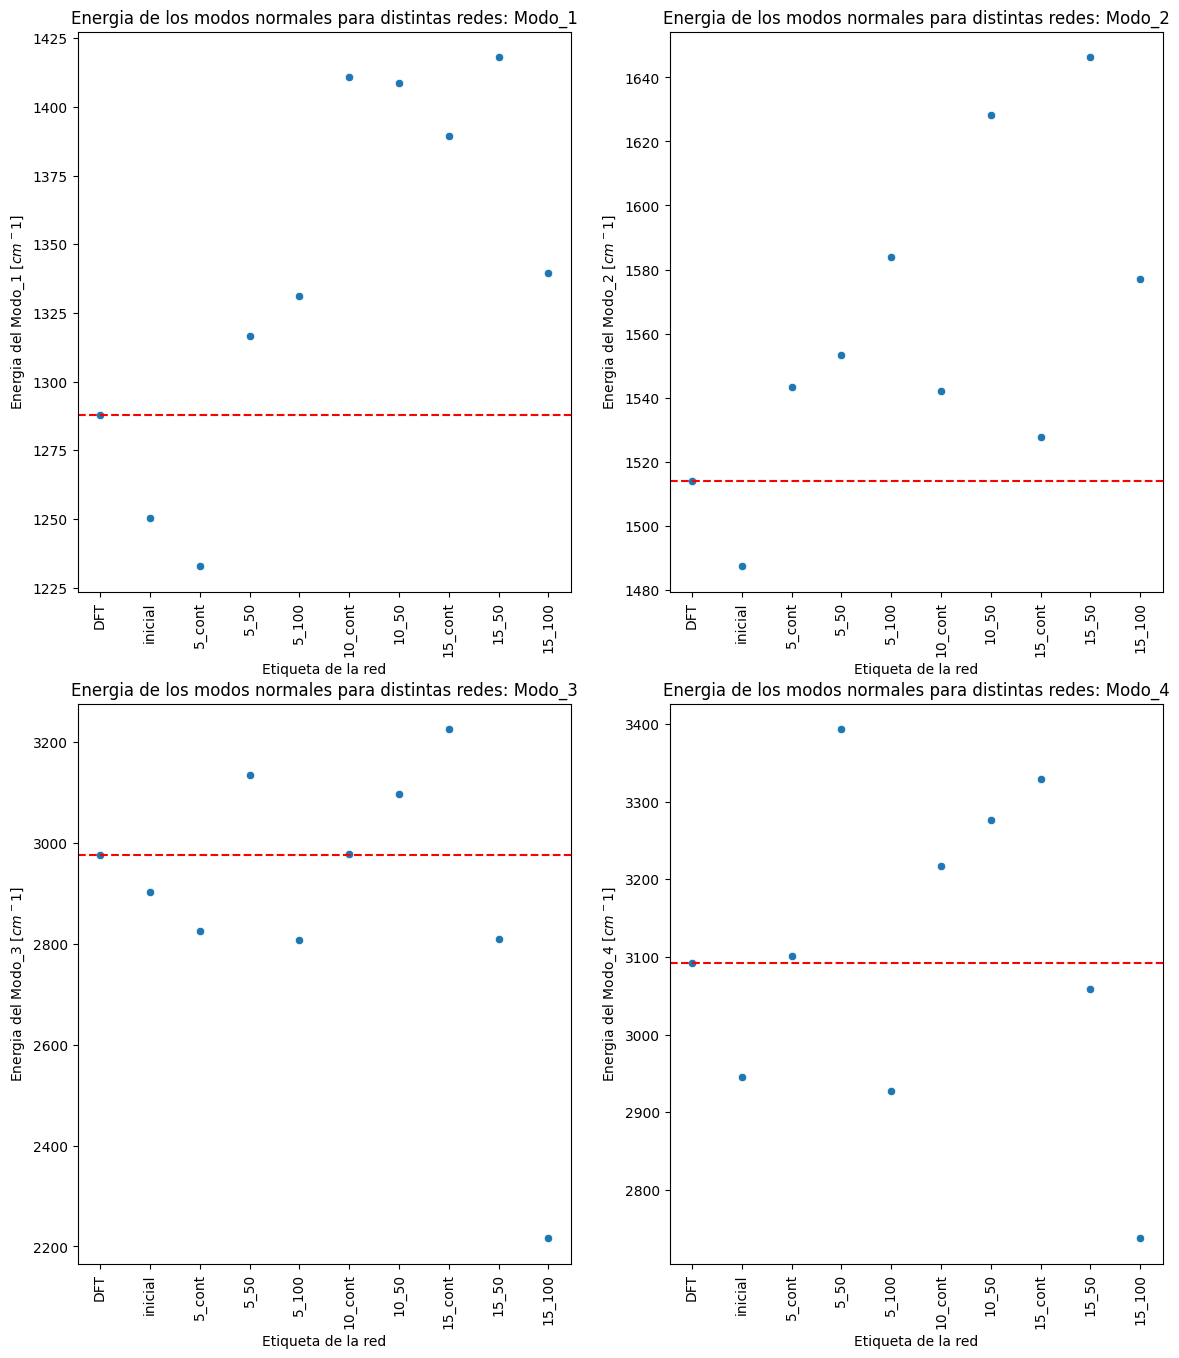

In [6]:
fig, ax = plt.subplots(2,2, figsize=(14,16))
ax[0,0] = plot_modos('Modo_1',ax[0,0])
ax[0,1] = plot_modos('Modo_2',ax[0,1])
ax[1,0] = plot_modos('Modo_3',ax[1,0])
ax[1,1] = plot_modos('Modo_4',ax[1,1])
plt.show()

In [36]:
nmodesT = nmodes.query('NN == "DFT" |NN == "inicial" |NN == "15_50"').T.iloc[1:]
nmodesT.columns = ['DFT','Inicial', 'Final']
nmodesT['di'] = nmodesT.Inicial - nmodesT.DFT
nmodesT['dpi'] = (nmodesT.Inicial - nmodesT.DFT)/nmodesT.DFT
nmodesT['df'] = nmodesT.Final - nmodesT.DFT
nmodesT['dpf'] = (nmodesT.Final - nmodesT.DFT)/nmodesT.DFT

In [37]:
nmodesT

,DFT,Inicial,Final,di,dpi,df,dpf
Modo_1,1288.0,1250.40374,1418.14127,-37.59626,-0.02919,130.14127,0.101041
Modo_2,1514.0,1487.29184,1646.33653,-26.70816,-0.017641,132.33653,0.087409
Modo_3,2975.0,2902.84728,2810.29901,-72.15272,-0.024253,-164.70099,-0.055362
Modo_4,3092.0,2945.30137,3058.2612,-146.69863,-0.047445,-33.7388,-0.010912


<Axes: >

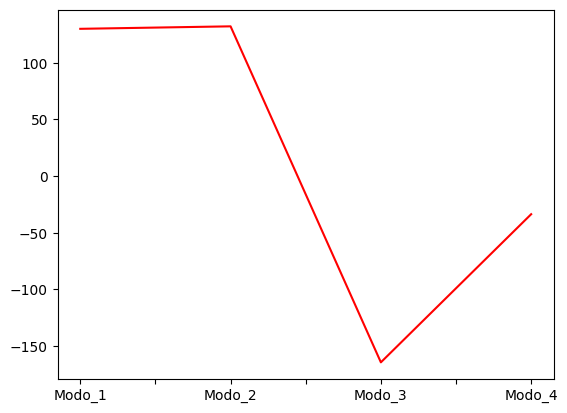

In [30]:
# nmodesT.di.plot(color='blue')
nmodesT.df.plot(color='red')